## Xingyu Liu DAV 6150 - Project 2

## Introduction

In this report, I will be applying the full data science project lifecycle to the implementation of SVM model and clustering model on a data set consisting of data on 18 different types of conditions in which the potential buyer visited the website, to use clustering algorithms to create groupings of similar data observations 
within the provided data set, apply labels to the data observations assigned to those groupings, and then, 
after completing the necessary EDA and data prep work, construct an SVM model to predict the most likely 
categorization of any previously unseen data items. This information will be used by online retailer to determine whether the potential buyer would finally buy the products on his/her website.

To accomplish this, I will first perform an exploratory data analysis on each of the variables in an effort to discover any data integrity issues (i.e. missing or invalid values), uncover any outliers, and see the distribution of our data. 

Then, based on the results of our EDA, I will perform the necessary data preparation and cleaning in order to prepare the data for use in a machine learning model. This work will be guided by our domain knowledge and our EDA. I will again perform an EDA on our transformed data, in order to see the effects of our transformations on the data. We will compare the results of our transformed data to those of the original data and discuss how our transformations will lead to a better machine learning model.

Then I will use  hierarchical clustering algorithms based on different exploratory variables,then I will implement a K-means clustering algorithm, then I will apply a K-means clustering algorithm to the data set using a value of K=2. Then I will compare the Revenue which is predicted by clustering algorithms with the true revenue. 

Apply my knowledge of feature selection and/or dimensionality reduction techniques to identify 
explanatory variables for inclusion within your SVM models, Then I will split the data into training and testing data set, create different SVM models using different combinations of exploratory variables for purposes of 
predicting the value of the Revenue classifier. then select the “best” classification model from those I have constructed. Then I will apply my preferred model to the testing data set and assess how well it performs on that 
previously unseen data for purposes of predicting the value of the Revenue classification.

Finally, I will compare the predicted values for the Revenue attribute from the testing data set to the 
corresponding values of the actual Revenue variable. 

## Data Profiling & Domain Knowledge Development

**Administrative** the number of Administrative pages visited by the visitor in that session.

**Administrative_Duration** total time spent in Administrative categories. 

**Informational** the number of Informational pages visited by the visitor in that session.

**Informational_Duration** total time spent in Informational categories. 

**ProductRelated** the number of Product Related pages visited by the visitor in that session.

**ProductRelated_Duration** total time spent in Product Related categories.

**BounceRates** the metrics measured by "Google Analytics" for each page in the e-commerce site. The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. 

**ExitRates** the metrics measured by "Google Analytics" for each page in the e-commerce site. The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session. 

**PageValues** the metrics measured by "Google Analytics" for each page in the e-commerce site. The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. 

**SpecialDay** The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8. 

**Month**  in which month the page is visted .

**OperatingSystems** An operating system (OS) is system software that manages computer hardware, software resources, and provides common services for computer programs. The dominant desktop operating system is Microsoft Windows with a market share of around 82.74%. macOS by Apple Inc. is in second place (13.23%), and the varieties of Linux are collectively in third place (1.57%).[this link](https://en.wikipedia.org/wiki/Operating_system)

**Browser** A web browser (commonly referred to as a browser) is a software application for accessing information on the World Wide Web. When a user requests a web page from a particular website, the web browser retrieves the necessary content from a web server and then displays the page on the user's device. The most used browser is Google Chrome. According to this. [this link](https://en.wikipedia.org/wiki/Web_browser)

**Region** how many regions the pages have.

**TrafficType** A traffic type is a particular identifier type for any hierarchy of your customer base. Traffic types in Split are completely customizable and can be any database key you choose to send to Split, i.e. a user ID, account ID, IP address, browser ID, etc. Essentially, any internal database key you're using to track what "customer" means to you. Supporting multiple traffic types gives you increased flexibility when designing your targeting rules. User or account are two of the most commonly defined traffic types. According to this. [this link](https://help.split.io/hc/en-us/articles/360019916311-Traffic-type#:~:text=A%20traffic%20type%20is%20a,address%2C%20browser%20ID%2C%20etc.&text=User%20or%20account%20are%20two%20of%20the%20most%20commonly%20defined%20traffic%20types)

**VisitorType** whether the website's visitor is a new visitor or returning visitor.

**Weekend** whether the page is visited on weekend or not.

**Revenue** whether the visitor finally purchased the products.

## Exploratory Data Analysis

First I will read the data into python using pandas read xls function. Then we will look for missing and/or invalid data values and perform an exploratory data analysis on dataset to determine what data need to be prepared for a future machine learning model. 

In [2]:
#first import the necessary libraries and modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as metrics

data = pd.read_excel("Project2_Data.xls")
labeldata = pd.read_excel("Project2_Data_Labels.xls")

#check results
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0,0.0,0,0.0,8,222.000000,0.000000,0.028571,53.474571,0.0,May,1,1,1,2,New_Visitor,True
1,0,0.0,0,0.0,14,1037.500000,0.014286,0.047619,0.000000,0.0,Mar,2,2,4,2,Returning_Visitor,False
2,4,37.5,2,82.0,4,96.625000,0.000000,0.017500,0.000000,0.0,Nov,2,2,9,2,New_Visitor,False
3,4,115.7,0,0.0,16,655.383333,0.000000,0.012037,0.000000,0.0,Nov,1,1,2,3,Returning_Visitor,False
4,1,60.0,1,15.0,26,670.166667,0.000000,0.003846,0.000000,0.0,May,2,2,3,4,Returning_Visitor,False


In [3]:
data.shape

(12330, 17)

In [4]:
#check the dataset for null values
data.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
dtype: int64

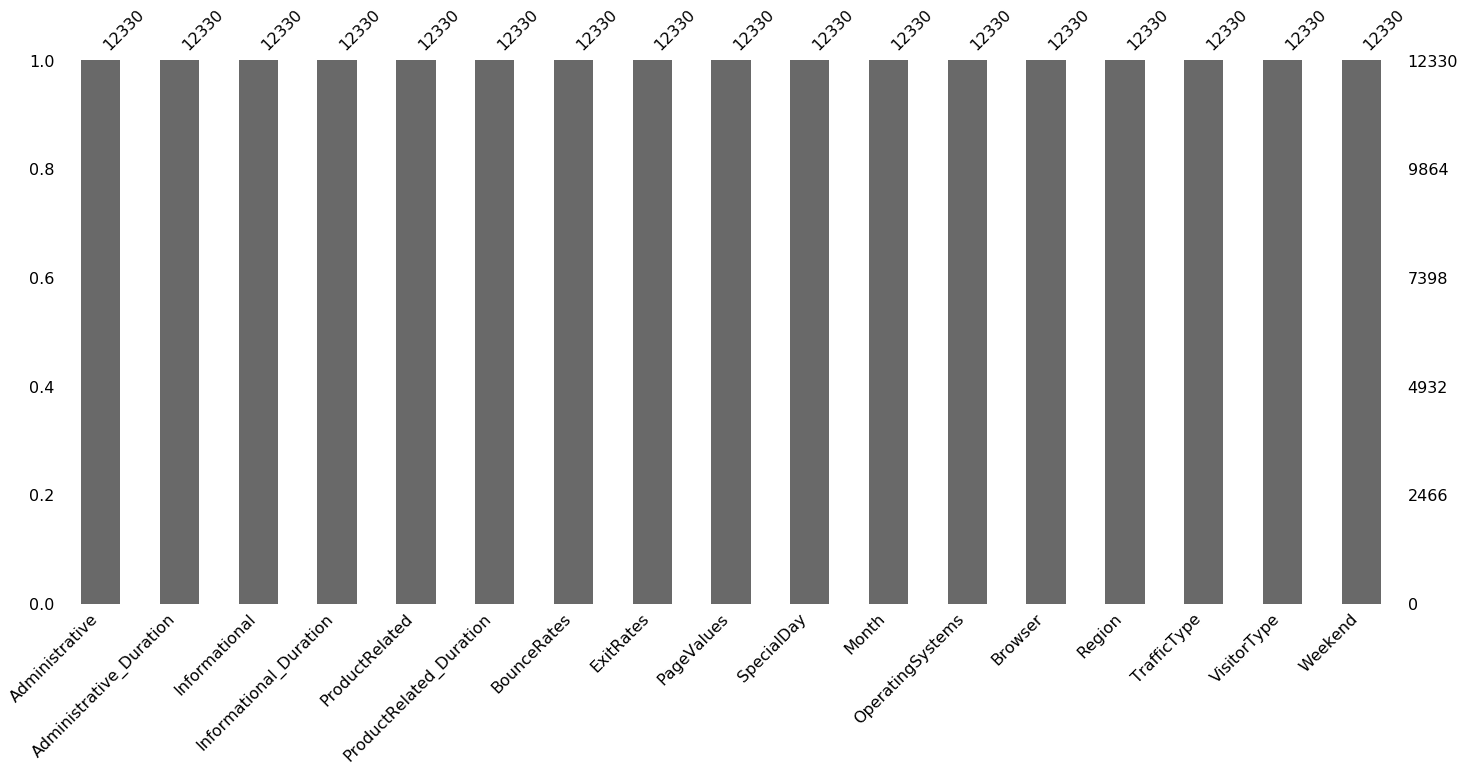

In [5]:
#first import missingno after pip install
import missingno as msno

#visualize the amount of missing data using missingno's bar chart
msno.bar(data);

#### I found the data has no missing values.

In [6]:
#get summary statistics for each variable, including mean, standard deviation, median, quartiles, and range
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


I see from above that the range of all variables are positive. 

ProductRelated_Duration has the highest standard deviation. BounceRates has the lowest standard deviation.

Then I will plot the histograms for numeric variables:

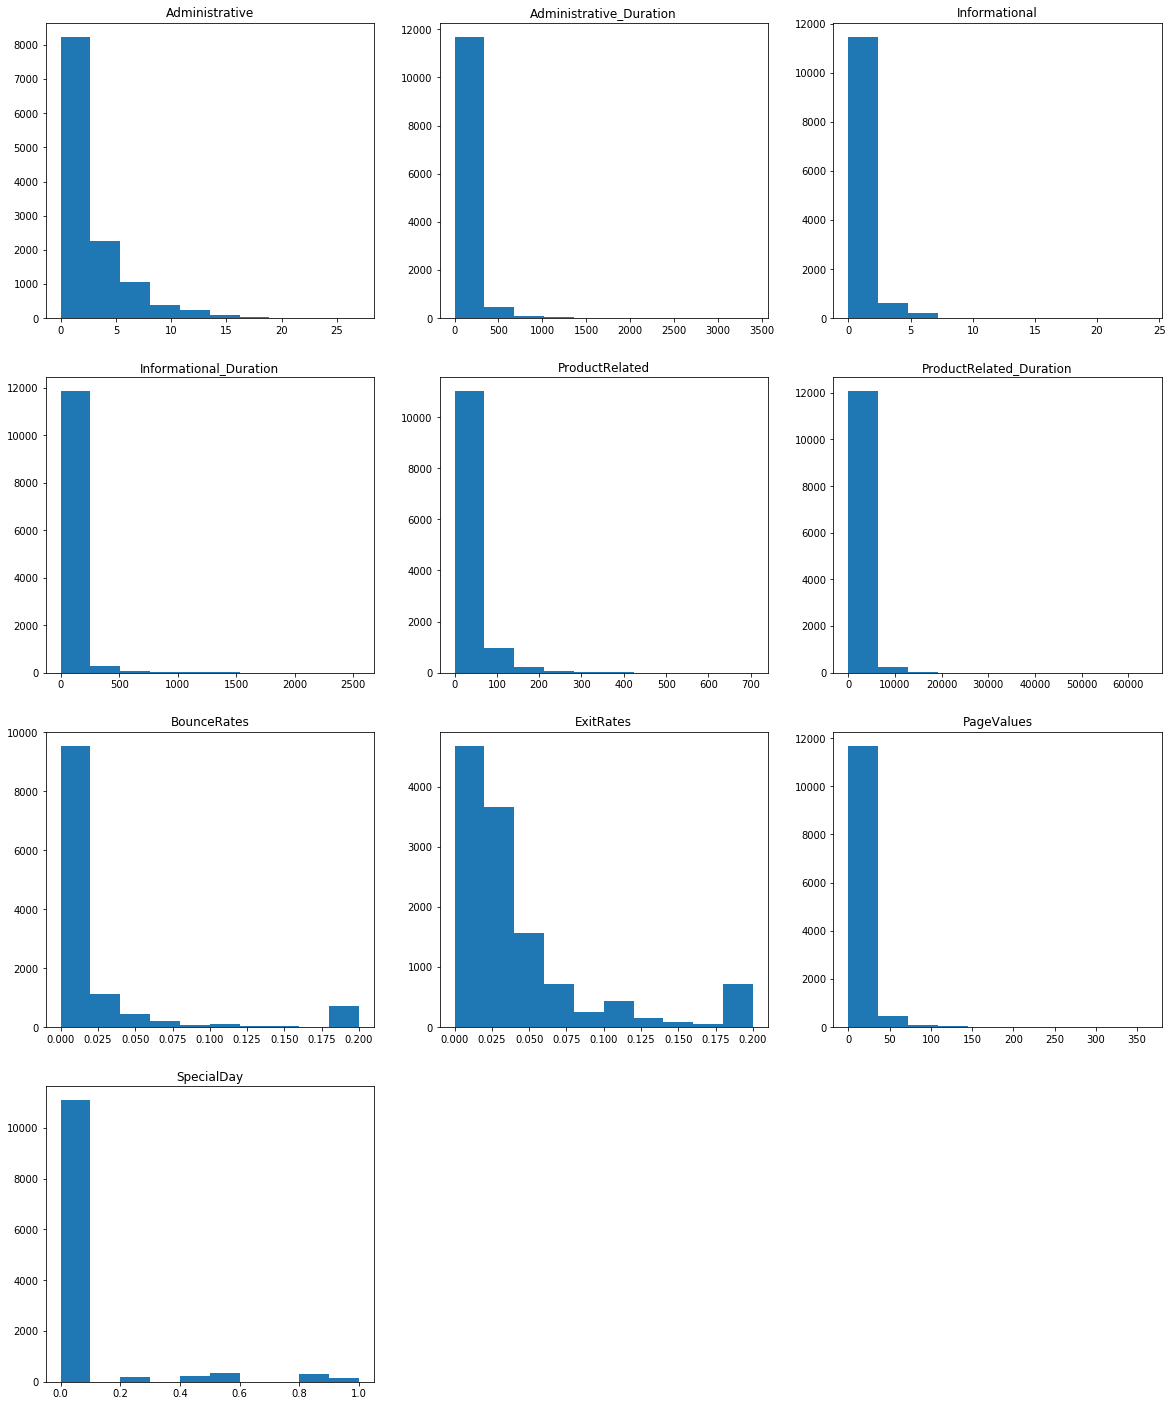

In [7]:
#define a figure to which we will add a histogram for each of our attributes, except for index
plt.figure(figsize=(20,25))

#ignore warnings
np.warnings.filterwarnings('ignore')

#use an index to identify the spot of the subplot
j=1
columns=data[['Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated',
              'ProductRelated_Duration','BounceRates','ExitRates','PageValues','SpecialDay']]
for k in columns[1:] :   
    plt.subplot(4,3,j) 
    plt.hist(data[k])
    plt.title('%s' %k)
    j=j+1 #add 1 to go to the next subplot space

#show results    
plt.show()

From the above histograms, I see that the majority of our attributes are approximately skewed distributed.

Next we will look at boxplots of our data to see if there are any outliers.

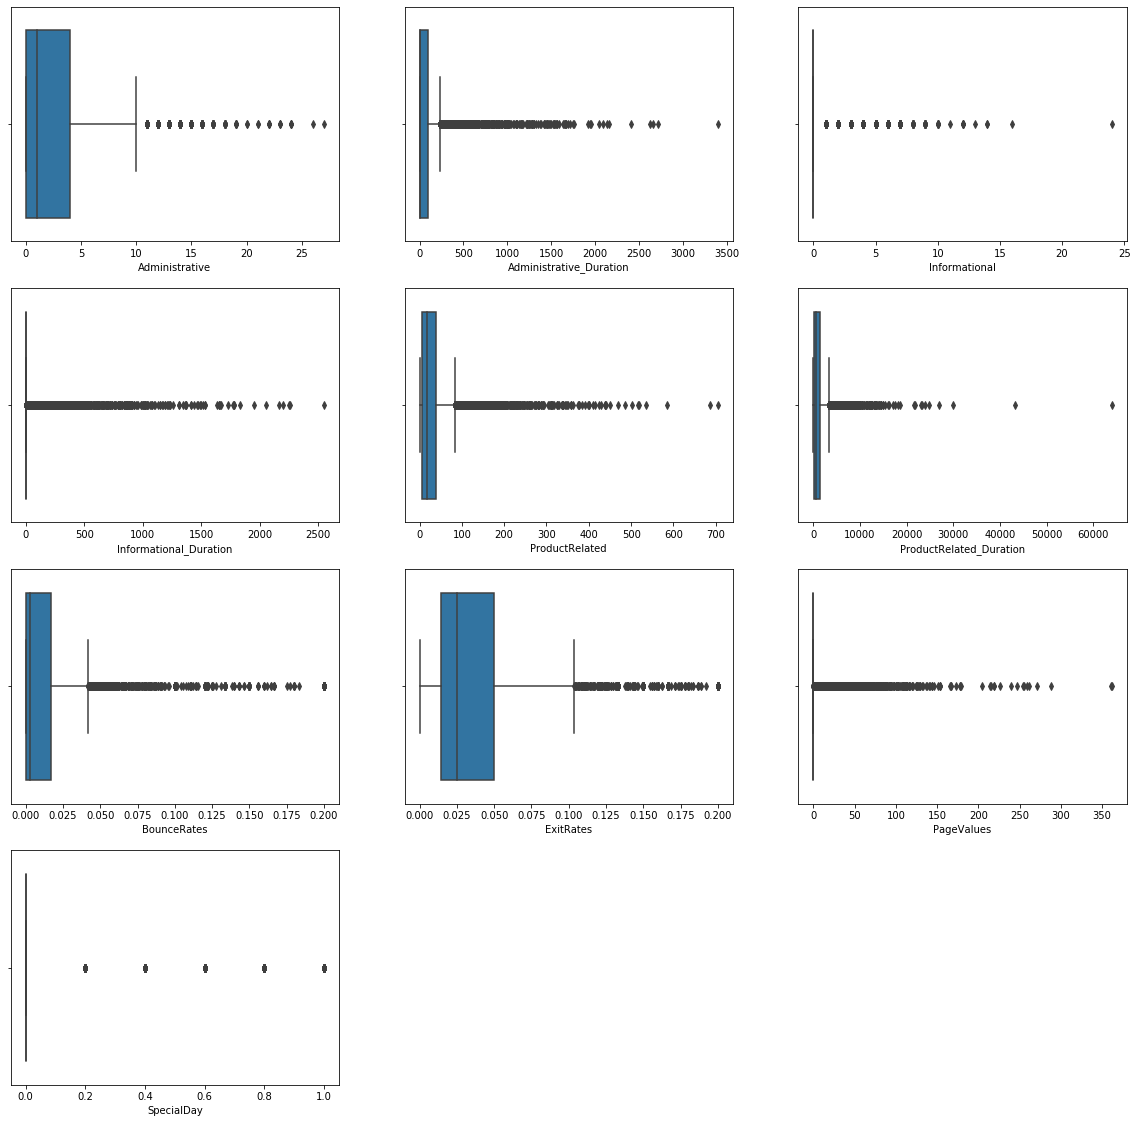

In [8]:
#define a figure to which we will add boxplots of each attribute.
plt.figure(figsize=(20,25))

#use an index to identify the spot of the subplot
j=1
columns=data[['Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated',
              'ProductRelated_Duration','BounceRates','ExitRates','PageValues','SpecialDay']]
for k in columns[1:] :   
    plt.subplot(5,3,j) 
    sns.boxplot(x=k,data=data)
    j=j+1 #add 1 to go to the next subplot space

#show results
plt.show()

From the above boxplots I see that most of our attributes have numerous outliers. I will discuss further below how I will deal with these outliers.

I will also check a correlation matrix between the variables before any transformation to see if our transformations have any effect on the correlation.

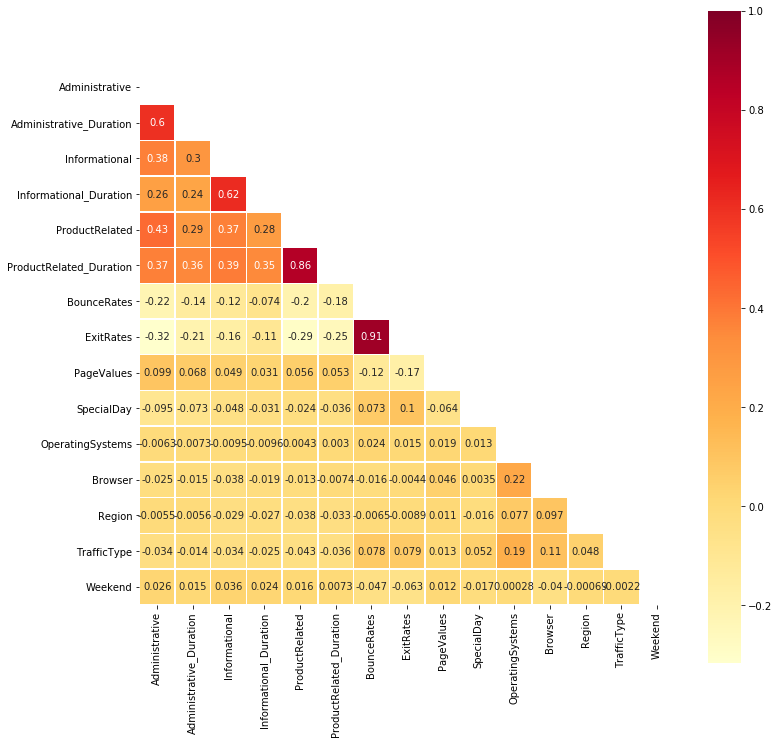

In [9]:
cor_matrix = data.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(cor_matrix, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize = (12, 12))
#Draw the heatmap with the mask and correct aspect ratio,mask=True,upper triangular will be hide
sns.heatmap(cor_matrix, mask=mask,
            square = True, linewidths = .5, ax = ax, cmap = "YlOrRd",annot=True)

I found that:

- Administrative_Duration has strong correlation with Administrative
- Informational_Duration has strong correlation with Informational
- ProductRelated_Duration has strong correlation with ProductRelated
- BounceRates has strong correlation with ExitRates

## Data Preparation and EDA Review - Substitute the negative values with their absolute value

Since there are no missing values and negative values, the only thing left is to deal with outliers.

## Working with Outliers: Correcting or Removing

### IQR score -
- Box plot use the IQR method to display data and outliers(shape of the data) but in order to be get a list of identified outlier, we will need to use the mathematical formula and retrieve the outlier data.
- The interquartile range (IQR), also called the midspread or middle 50%, or technically H-spread, is a measure of statistical dispersion, being equal to the difference between 75th and 25th percentiles, or between upper and lower quartiles, IQR = Q3 − Q1.
- In other words, the IQR is the first quartile subtracted from the third quartile; these quartiles can be clearly seen on a box plot on the data.
- It is a measure of the dispersion similar to standard deviation or variance, but is much more robust against outliers.
- IQR is somewhat similar to Z-score in terms of finding the distribution of data and then keeping some threshold to identify the outlier.
- First I will calculate IQR:

In [10]:
data1 = data.copy()
Q1 = data1.quantile(0.25)
Q3 = data1.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Administrative                4.000000
Administrative_Duration      93.256250
Informational                 0.000000
Informational_Duration        0.000000
ProductRelated               31.000000
ProductRelated_Duration    1280.019714
BounceRates                   0.016813
ExitRates                     0.035714
PageValues                    0.000000
SpecialDay                    0.000000
OperatingSystems              1.000000
Browser                       0.000000
Region                        3.000000
TrafficType                   2.000000
Weekend                       0.000000
dtype: float64


I got IQR for each column.
As we now have the IQR scores, it’s time to get hold on outliers. The below code will give an output with some true and false values. The data point where we have False that means these values are valid whereas True indicates presence of an outlier.

In [11]:
print (((data1 < (Q1 - 1.5 * IQR)) | (data1 > (Q3 + 1.5 * IQR))))

       Administrative  Administrative_Duration  BounceRates  Browser  \
0               False                    False        False     True   
1               False                    False        False    False   
2               False                    False        False    False   
3               False                    False        False     True   
4               False                    False        False    False   
...               ...                      ...          ...      ...   
12325           False                    False        False    False   
12326           False                    False        False    False   
12327           False                    False        False    False   
12328           False                    False        False     True   
12329           False                    False        False     True   

       ExitRates  Informational  Informational_Duration  Month  \
0          False          False                   False  False   
1  

Check how many outliers there are:

In [12]:
data_out = data1[~((data1 < (Q1 - 1.5 * IQR)) |(data1 > (Q3 + 1.5 * IQR))).any(axis=1)]
data_out.shape

(1971, 17)

In [13]:
data_out

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
1,0,0.000000,0,0.0,14,1037.500000,0.014286,0.047619,0.0,0.0,Mar,2,2,4,2,Returning_Visitor,False
16,0,0.000000,0,0.0,20,447.500000,0.020000,0.040000,0.0,0.0,Mar,2,2,1,1,Returning_Visitor,False
23,3,47.400000,0,0.0,21,961.520000,0.030435,0.053623,0.0,0.0,Aug,3,2,4,4,Returning_Visitor,False
24,10,170.150000,0,0.0,11,71.350000,0.000000,0.002353,0.0,0.0,Aug,2,2,1,2,New_Visitor,False
27,0,0.000000,0,0.0,1,8.000000,0.000000,0.000000,0.0,0.0,Sep,2,2,2,1,Returning_Visitor,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12298,10,150.208333,0,0.0,14,221.208333,0.000000,0.012698,0.0,0.0,Dec,2,2,4,2,New_Visitor,False
12300,0,0.000000,0,0.0,16,318.066667,0.025000,0.033333,0.0,0.0,Jul,3,2,3,1,Returning_Visitor,False
12310,0,0.000000,0,0.0,2,28.200000,0.000000,0.100000,0.0,0.0,Jul,2,2,1,1,Returning_Visitor,False
12322,0,0.000000,0,0.0,5,127.500000,0.040000,0.060000,0.0,0.0,Nov,3,2,6,3,Returning_Visitor,False


There are 1971 X 17 outliers, which occupied not that much comparing with the original 12330 X 17 datas. Therefore, I decide to delete the outliers other than substituting the outliers.

## Plot the dataframe and removing the outliers:

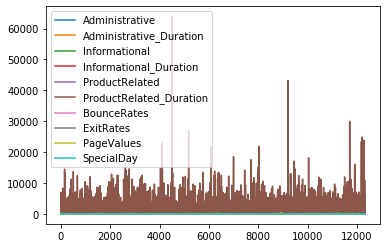

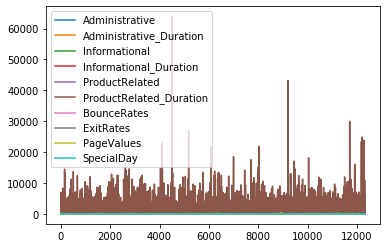

In [14]:
y = data1[['Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated',
              'ProductRelated_Duration','BounceRates','ExitRates','PageValues','SpecialDay']]
y.plot().get_figure()

11773/12330 data points remain.
Int64Index([   12,    20,    24,    26,    55,    56,    86,    90,   131,
              158,
            ...
            12198, 12214, 12222, 12224, 12270, 12273, 12289, 12293, 12298,
            12323],
           dtype='int64', length=557)


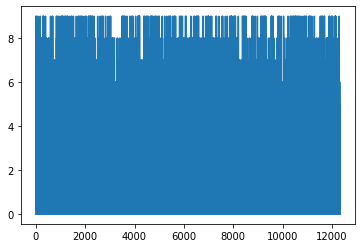

In [15]:
y = data1['Administrative']
removed_outliers = y.between(y.quantile(.05), y.quantile(.95))
size=12330
print(str(y[removed_outliers].size) + "/" + str(size) + " data points remain.") 

y[removed_outliers].plot().get_figure()

index_names = data1[~removed_outliers].index # INVERT removed_outliers!!
print(index_names) # The resulting index to drop.

import plotly.graph_objs as go

data1.drop(index_names, inplace=True)

11185/12330 data points remain.
Int64Index([    6,     9,    31,    54,    84,   105,   143,   163,   167,
              177,
            ...
            11916, 11943, 12065, 12089, 12093, 12132, 12139, 12264, 12287,
            12309],
           dtype='int64', length=588)


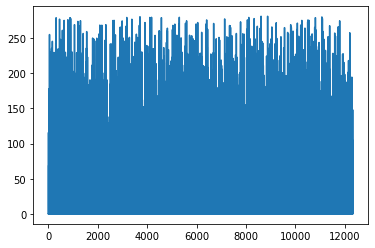

In [16]:
y = data1['Administrative_Duration']
removed_outliers = y.between(y.quantile(.05), y.quantile(.95))
size=12330
print(str(y[removed_outliers].size) + "/" + str(size) + " data points remain.") 

y[removed_outliers].plot().get_figure()

index_names = data1[~removed_outliers].index # INVERT removed_outliers!!
print(index_names) # The resulting index to drop.

import plotly.graph_objs as go

data1.drop(index_names, inplace=True)

10625/12330 data points remain.
Int64Index([   88,   132,   137,   139,   160,   162,   180,   193,   210,
              226,
            ...
            12103, 12106, 12107, 12109, 12158, 12174, 12206, 12217, 12245,
            12303],
           dtype='int64', length=560)


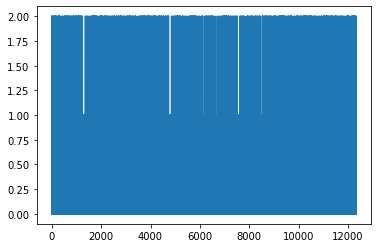

In [17]:
y = data1['Informational']
removed_outliers = y.between(y.quantile(.05), y.quantile(.95))
size=12330
print(str(y[removed_outliers].size) + "/" + str(size) + " data points remain.") 

y[removed_outliers].plot().get_figure()

index_names = data1[~removed_outliers].index # INVERT removed_outliers!!
print(index_names) # The resulting index to drop.

import plotly.graph_objs as go

data1.drop(index_names, inplace=True)

10094/12330 data points remain.
Int64Index([    2,    11,    40,    70,   103,   110,   115,   116,   129,
              145,
            ...
            12151, 12195, 12208, 12228, 12229, 12242, 12254, 12275, 12302,
            12315],
           dtype='int64', length=531)


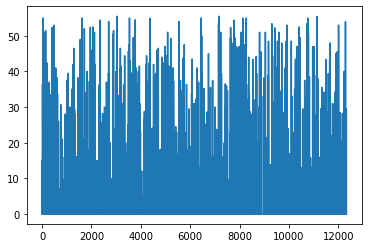

In [18]:
y = data1['Informational_Duration']
removed_outliers = y.between(y.quantile(.05), y.quantile(.95))
size=12330
print(str(y[removed_outliers].size) + "/" + str(size) + " data points remain.") 

y[removed_outliers].plot().get_figure()

index_names = data1[~removed_outliers].index # INVERT removed_outliers!!
print(index_names) # The resulting index to drop.

import plotly.graph_objs as go

data1.drop(index_names, inplace=True)

9572/12330 data points remain.
Int64Index([    5,    28,    63,    77,    80,   113,   128,   153,   166,
              178,
            ...
            12185, 12209, 12216, 12237, 12251, 12256, 12258, 12260, 12319,
            12327],
           dtype='int64', length=522)


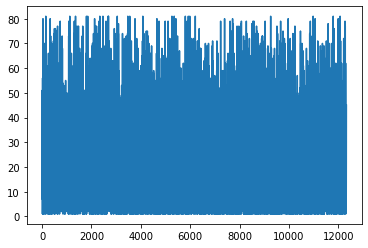

In [19]:
y = data1['ProductRelated']
removed_outliers = y.between(y.quantile(.05), y.quantile(.95))
size=12330
print(str(y[removed_outliers].size) + "/" + str(size) + " data points remain.") 

y[removed_outliers].plot().get_figure()

index_names = data1[~removed_outliers].index # INVERT removed_outliers!!
print(index_names) # The resulting index to drop.

import plotly.graph_objs as go

data1.drop(index_names, inplace=True)

9093/12330 data points remain.
Int64Index([   22,    51,    85,    89,   101,   121,   171,   219,   239,
              334,
            ...
            12094, 12134, 12207, 12232, 12247, 12272, 12281, 12283, 12297,
            12329],
           dtype='int64', length=479)


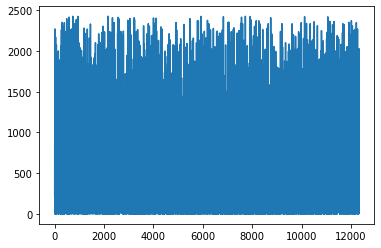

In [20]:
y = data1['ProductRelated_Duration']
removed_outliers = y.between(y.quantile(.05), y.quantile(.95))
size=12330
print(str(y[removed_outliers].size) + "/" + str(size) + " data points remain.") 

y[removed_outliers].plot().get_figure()

index_names = data1[~removed_outliers].index # INVERT removed_outliers!!
print(index_names) # The resulting index to drop.

import plotly.graph_objs as go

data1.drop(index_names, inplace=True)

9093/12330 data points remain.
Int64Index([], dtype='int64')


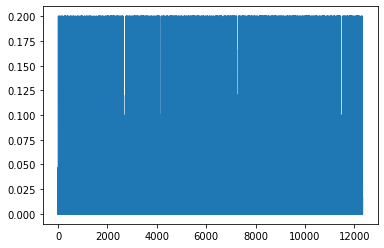

In [21]:
y = data1['BounceRates']
removed_outliers = y.between(y.quantile(.05), y.quantile(.95))
size=12330
print(str(y[removed_outliers].size) + "/" + str(size) + " data points remain.") 

y[removed_outliers].plot().get_figure()

index_names = data1[~removed_outliers].index # INVERT removed_outliers!!
print(index_names) # The resulting index to drop.

import plotly.graph_objs as go

data1.drop(index_names, inplace=True)

8638/12330 data points remain.
Int64Index([    4,    27,    34,    45,    48,   149,   152,   154,   161,
              196,
            ...
            12079, 12092, 12110, 12131, 12149, 12157, 12163, 12233, 12265,
            12311],
           dtype='int64', length=455)


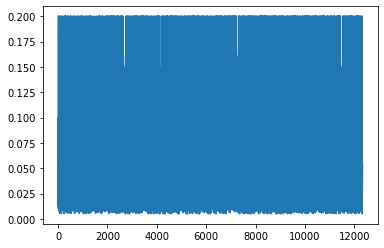

In [22]:
y = data1['ExitRates']
removed_outliers = y.between(y.quantile(.05), y.quantile(.95))
size=12330
print(str(y[removed_outliers].size) + "/" + str(size) + " data points remain.") 

y[removed_outliers].plot().get_figure()

index_names = data1[~removed_outliers].index # INVERT removed_outliers!!
print(index_names) # The resulting index to drop.

import plotly.graph_objs as go

data1.drop(index_names, inplace=True)

8206/12330 data points remain.
Int64Index([    0,    10,    50,    57,    62,    79,    98,   118,   155,
              223,
            ...
            12050, 12051, 12095, 12126, 12127, 12160, 12172, 12191, 12204,
            12248],
           dtype='int64', length=432)


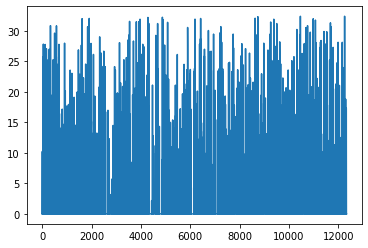

In [23]:
y = data1['PageValues']
removed_outliers = y.between(y.quantile(.05), y.quantile(.95))
size=12330
print(str(y[removed_outliers].size) + "/" + str(size) + " data points remain.") 

y[removed_outliers].plot().get_figure()

index_names = data1[~removed_outliers].index # INVERT removed_outliers!!
print(index_names) # The resulting index to drop.

import plotly.graph_objs as go

data1.drop(index_names, inplace=True)

7833/12330 data points remain.
Int64Index([   44,   112,   198,   199,   236,   271,   288,   299,   353,
              364,
            ...
            12130, 12138, 12140, 12154, 12201, 12219, 12312, 12316, 12321,
            12328],
           dtype='int64', length=373)


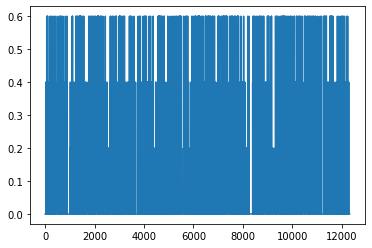

In [24]:
y = data1['SpecialDay']
removed_outliers = y.between(y.quantile(.05), y.quantile(.95))
size=12330
print(str(y[removed_outliers].size) + "/" + str(size) + " data points remain.") 

y[removed_outliers].plot().get_figure()

index_names = data1[~removed_outliers].index # INVERT removed_outliers!!
print(index_names) # The resulting index to drop.

import plotly.graph_objs as go

data1.drop(index_names, inplace=True)

In [25]:
#Check the shape of the data after removing the outliers
data1.shape

(7833, 17)

Now I have removed the outliers, let me see whether the transformation change the distribution of the data:

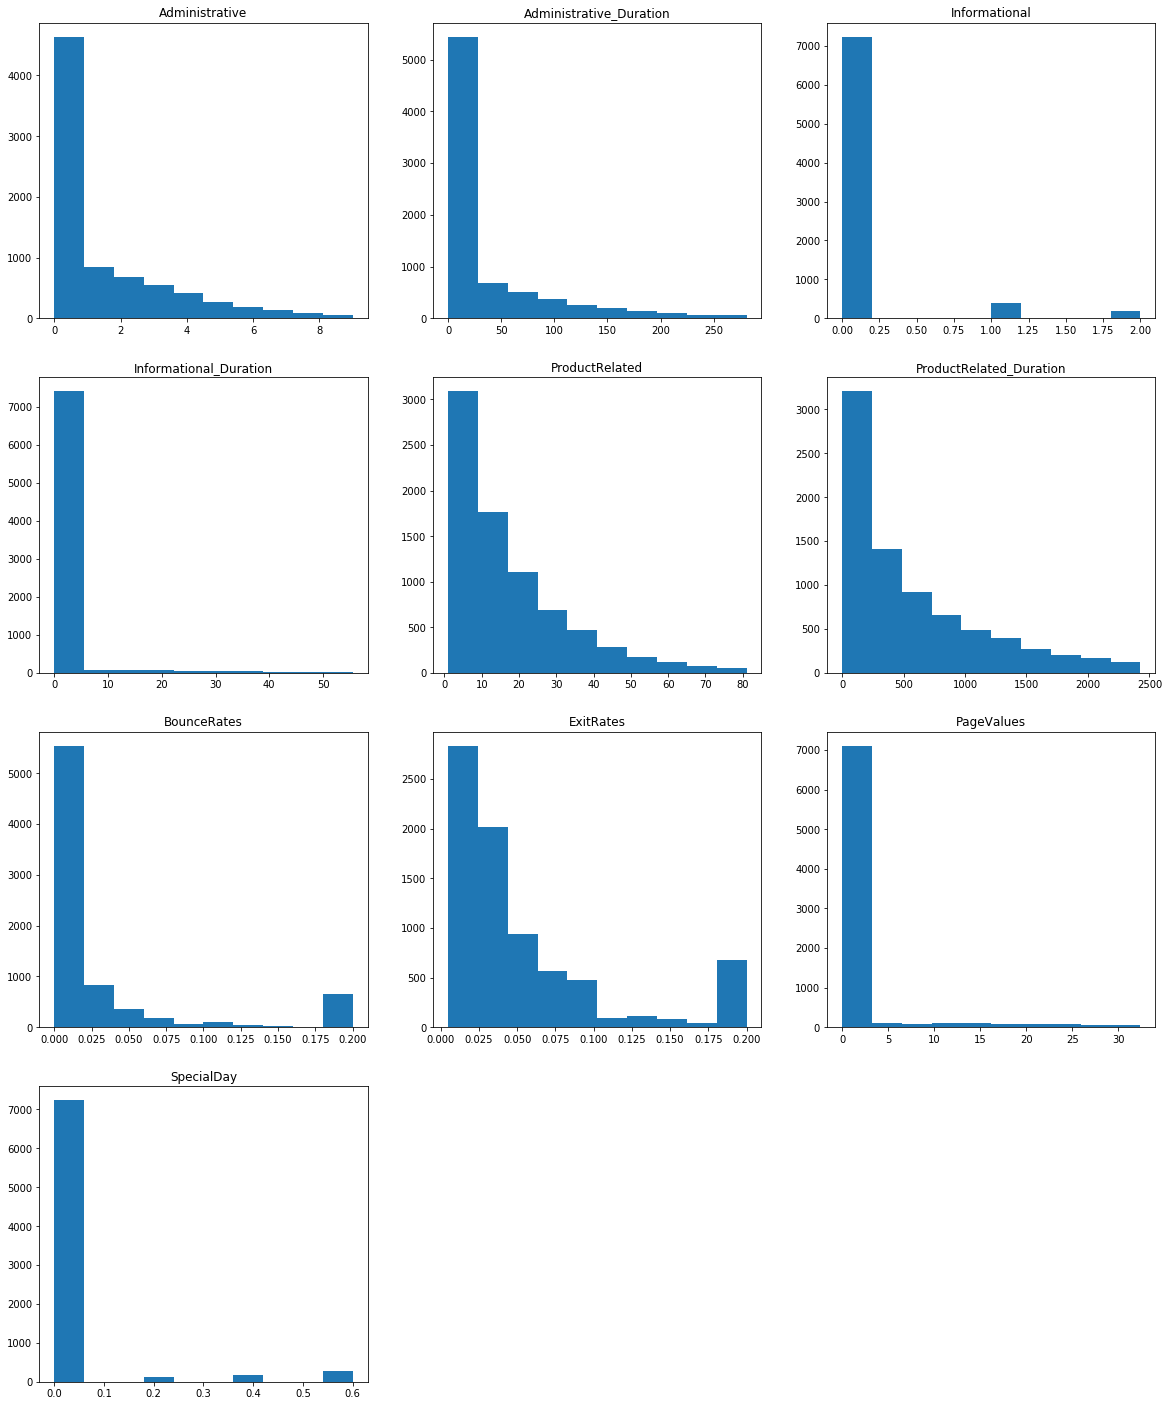

In [26]:
#define a figure to which we will add a histogram for each of our attributes, except for index
plt.figure(figsize=(20,25))

#ignore warnings
np.warnings.filterwarnings('ignore')

#use an index to identify the spot of the subplot
j=1
columns=data1[['Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated',
              'ProductRelated_Duration','BounceRates','ExitRates','PageValues','SpecialDay']]
for k in columns[1:] :   
    plt.subplot(4,3,j) 
    plt.hist(data1[k])
    plt.title('%s' %k)
    j=j+1 #add 1 to go to the next subplot space

#show results    
plt.show()

The transformation has changed the distribution, the graphs are more approximated to skewed distributions.

Plot the boxplots again:

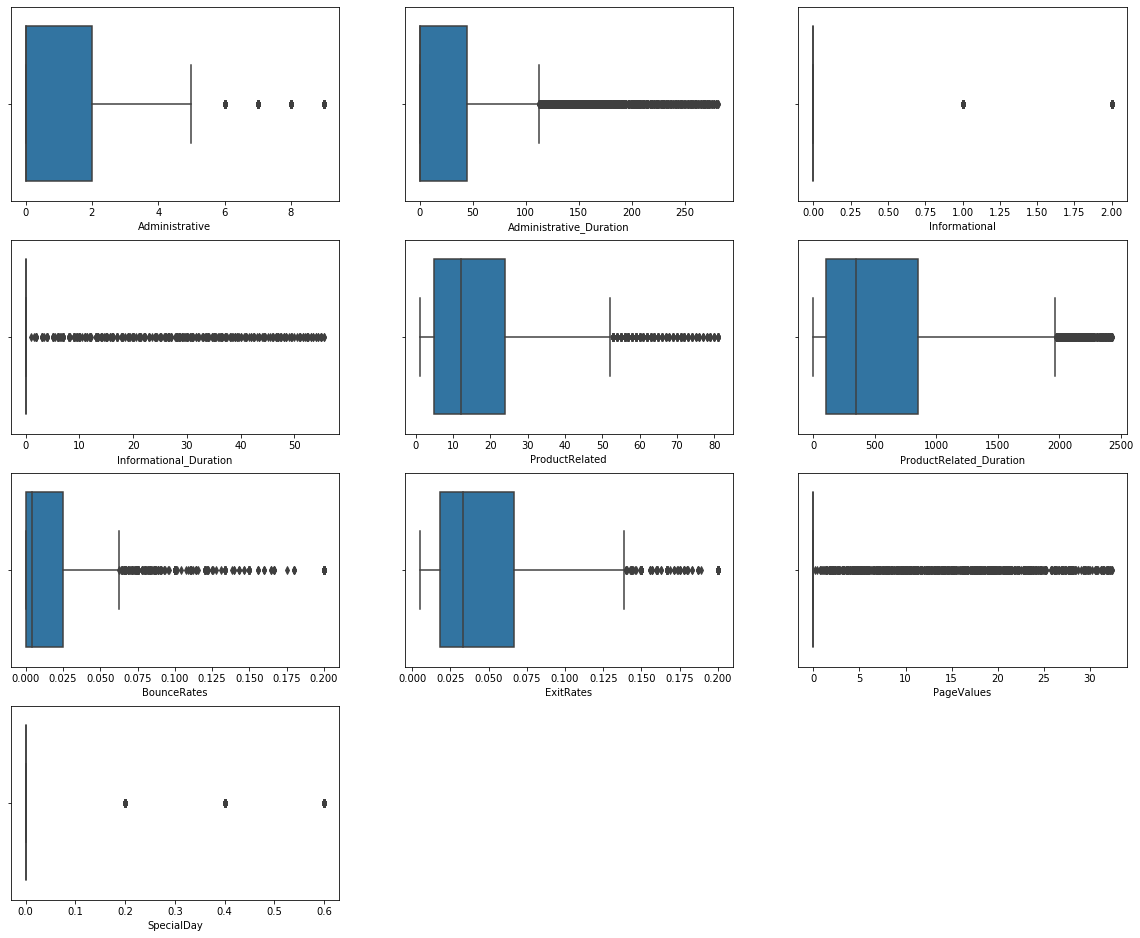

In [27]:
#graph the boxplots. Define the figure to which we will append our boxplots
plt.figure(figsize=(20,25))

#use an index to identify the spot of the subplot
j=1
columns=data1[['Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated',
              'ProductRelated_Duration','BounceRates','ExitRates','PageValues','SpecialDay']]
for k in columns:   #for each column in the dataframe
    plt.subplot(6,3,j) 
    sns.boxplot(x=k,data=data1)
    j=j+1 #add 1 to go to the next subplot space
#show results    
plt.show()

The boxplots showed after removing of the outliers, the data became bettter.



## Feature extraction:

Since the more pages the vistor read, the more time he/she would spend on the page, I plan to create three new explanatory variables: 

- AD: Administrative duration per page, calculated by Administrative_Duration/Administrative
- ID: Informational duration per page, calculated by Informational_Duration/Informational
- PRD: Product Related duration per page, calculated by ProductRelated_Duration/ProductRelated

In [28]:
data1['AD']  = data1.Administrative_Duration / data1.Administrative
data1.drop(['Administrative_Duration','Administrative'],axis = 1, inplace = True)

In [29]:
data1['ID']  = data1.Informational_Duration / data1.Informational
data1.drop(['Informational_Duration','Informational'],axis = 1, inplace = True)

In [30]:
data1['PRD']  = data1.ProductRelated_Duration / data1.ProductRelated
data1.drop(['ProductRelated_Duration','ProductRelated'],axis = 1, inplace = True)

### Standarization of the data:

In general, data is usually standardized prior to the application of a clustering algorithm. Data standardization will ensure that all of the features within a data set are of similar scale. Therefore, I plan to standarize the data:

In [31]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data1['AD'] = scaler.fit_transform(data1['AD'].values.reshape(-1,1))
data1['AD'].dropna()

3        0.111250
7        0.000000
8        0.016667
14       0.384615
18       0.097115
           ...   
12299    0.007692
12308    0.183269
12317    0.052885
12325    0.189744
12326    0.034615
Name: AD, Length: 3198, dtype: float64

In [32]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data1['ID'] = scaler.fit_transform(data1['ID'].values.reshape(-1,1))

data1['ID'].dropna()

18       0.127273
19       0.331818
38       0.190909
53       0.222727
99       0.000000
           ...   
12266    0.136364
12291    0.490909
12292    0.181818
12301    0.000000
12326    0.536364
Name: ID, Length: 601, dtype: float64

In [33]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data1['PRD'] = scaler.fit_transform(data1['PRD'].values.reshape(-1,1))

data1['PRD'].dropna()

1        0.054331
3        0.030030
7        0.083242
8        0.008326
13       0.019191
           ...   
12320    0.016140
12322    0.018695
12324    0.135197
12325    0.026805
12326    0.036899
Name: PRD, Length: 7833, dtype: float64

In [34]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data1['BounceRates'] = scaler.fit_transform(data1['BounceRates'].values.reshape(-1,1))

data1['BounceRates'].dropna()

1        0.071429
3        0.000000
7        0.000000
8        0.000000
13       0.235294
           ...   
12320    0.000000
12322    0.200000
12324    0.000000
12325    0.000000
12326    0.038462
Name: BounceRates, Length: 7833, dtype: float64

In [35]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data1['ExitRates'] = scaler.fit_transform(data1['ExitRates'].values.reshape(-1,1))

data1['ExitRates'].dropna()

1        0.219115
3        0.036773
7        0.097102
8        0.077580
13       0.296630
           ...   
12320    0.248399
12322    0.282562
12324    0.161436
12325    0.114850
12326    0.251027
Name: ExitRates, Length: 7833, dtype: float64

In [36]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data1['PageValues'] = scaler.fit_transform(data1['PageValues'].values.reshape(-1,1))

data1['PageValues'].dropna()

1        0.00000
3        0.00000
7        0.31591
8        0.00000
13       0.00000
          ...   
12320    0.00000
12322    0.00000
12324    0.00000
12325    0.00000
12326    0.00000
Name: PageValues, Length: 7833, dtype: float64

In [37]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data1['SpecialDay'] = scaler.fit_transform(data1['SpecialDay'].values.reshape(-1,1))

data1['SpecialDay'].dropna()

1        0.0
3        0.0
7        0.0
8        0.0
13       0.0
        ... 
12320    0.0
12322    0.0
12324    0.0
12325    0.0
12326    0.0
Name: SpecialDay, Length: 7833, dtype: float64

Clustering algorithms don’t work well with non-numeric data: how should such attributes be prepped for use within a clustering algorithm? 

I could use the kmodes in scikit-learn for categorical variables. But in this project I leave the categorical variables alone because I could not install the Kmodes package in my system.

For information about kmodes, this link is good: [this link](https://medium.com/@davidmasse8/unsupervised-learning-for-categorical-data-dd7e497033ae)

## Apply a hierarchical clustering algorithm to the data.

There are two types of hierarchical clustering: Agglomerative and Divisive. In the former, data points are clustered using a bottom-up approach starting with individual data points, while in the latter top-down approach is followed where all the data points are treated as one big cluster and the clustering process involves dividing the one big cluster into several small clusters.

Steps to Perform Hierarchical Clustering

Following are the steps involved in agglomerative clustering:

- At the start, treat each data point as one cluster. Therefore, the number of clusters at the start will be K, while K is an integer representing the number of data points.
- Form a cluster by joining the two closest data points resulting in K-1 clusters.
- Form more clusters by joining the two closest clusters resulting in K-2 clusters.
- Repeat the above three steps until one big cluster is formed.
- Once single cluster is formed, dendrograms are used to divide into multiple clusters depending upon the problem. 

There are different ways to find distance between the clusters. The distance itself can be Euclidean or Manhattan distance. Following are some of the options to measure distance between two clusters:

- Measure the distance between the closes points of two clusters.
- Measure the distance between the farthest points of two clusters.
- Measure the distance between the centroids of two clusters.
- Measure the distance between all possible combination of points between the two clusters and take the mean.

Next, I need to know the clusters that we want our data to be split to. I will use the scipy library to create the dendrograms for our dataset. Execute the following script to do so:

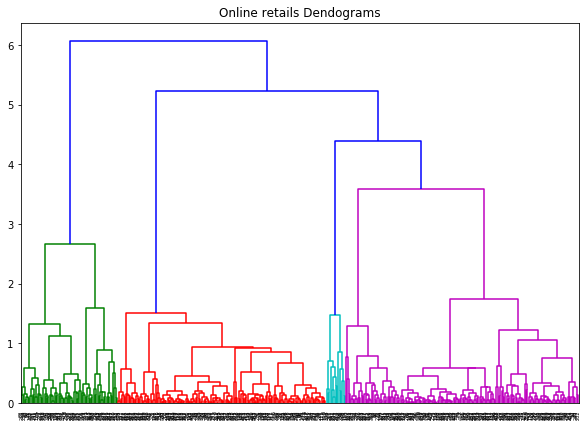

In [38]:
import scipy.cluster.hierarchy as shc
data3 = data1[['AD','ID','PRD','BounceRates','ExitRates','PageValues','SpecialDay']].dropna()
plt.figure(figsize=(10, 7))
plt.title("Online retails Dendograms")
dend = shc.dendrogram(shc.linkage(data3, method='ward'))

If we draw a horizontal line that passes through longest distance without a horizontal line, we get 6 clusters.

Now we know the number of clusters for our dataset, the next step is to group the data points into these six clusters. To do so we will use the AgglomerativeClustering class of the sklearn.cluster library:

In the code I import the AgglomerativeClustering class from the "sklearn.cluster" library. The number of parameters is set to 2 using the n_clusters parameter while the affinity is set to "euclidean" (distance between the datapoints). Finally linkage parameter is set to "ward", which minimizes the variant between the clusters.

In [39]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')
cluster.fit_predict(data3)

array([2, 1, 0, 2, 2, 2, 0, 5, 5, 0, 0, 2, 2, 0, 2, 0, 0, 4, 2, 4, 5, 2,
       5, 0, 0, 5, 1, 4, 2, 0, 0, 0, 5, 5, 2, 2, 0, 3, 1, 2, 5, 2, 4, 4,
       4, 0, 0, 2, 0, 2, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2, 2, 0, 5, 2, 2, 2,
       0, 5, 2, 2, 4, 5, 0, 0, 2, 5, 1, 0, 5, 0, 5, 2, 2, 5, 0, 0, 0, 0,
       4, 2, 2, 0, 4, 2, 0, 5, 2, 2, 3, 3, 0, 0, 2, 1, 4, 5, 0, 0, 0, 2,
       4, 2, 2, 1, 2, 2, 4, 2, 1, 4, 0, 2, 0, 0, 0, 4, 2, 0, 2, 0, 4, 2,
       0, 0, 2, 2, 5, 2, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2, 2, 0, 2, 5, 0,
       3, 2, 0, 4, 2, 2, 0, 2, 0, 0, 2, 1, 4, 4, 2, 0, 0, 2, 2, 2, 5, 5,
       2, 0, 0, 0, 0, 3, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 4, 5, 2,
       1, 1, 0, 2, 5, 2, 5, 0, 0, 2, 2, 1, 2, 2, 2, 3, 0, 2, 2, 2, 2, 1,
       5, 5, 4, 3, 4, 2, 3, 2, 4, 0, 0, 5, 2, 4, 3, 5, 2, 1, 2, 0, 0, 5,
       3, 0, 2, 5, 0, 2, 1, 2, 0, 3, 0, 2, 0, 5, 0, 4, 0, 5, 0, 0, 1, 0,
       1, 2, 0, 0, 4, 2, 2, 2, 5, 2, 4, 0, 0, 2, 0, 2, 1, 4, 0, 2, 0, 0,
       0, 5, 2, 2, 2, 1, 2, 2, 0, 0, 2, 0, 0, 5, 0,

The cluster labels from all of data points. Since I had six clusters, I have six labels in the output i.e. 0 to 5.

## Implement a K-means clustering algorithm. 

### Determine optimal k
The technique to determine K, the number of clusters, is called the elbow method.

I’ll plot:

- values for K on the horizontal axis
- the distortion on the Y axis (the values calculated with the cost function).

When K increases, the centroids are closer to the clusters centroids.
The improvements will decline, at some point rapidly, creating the elbow shape.
That point is the optimal value for K.

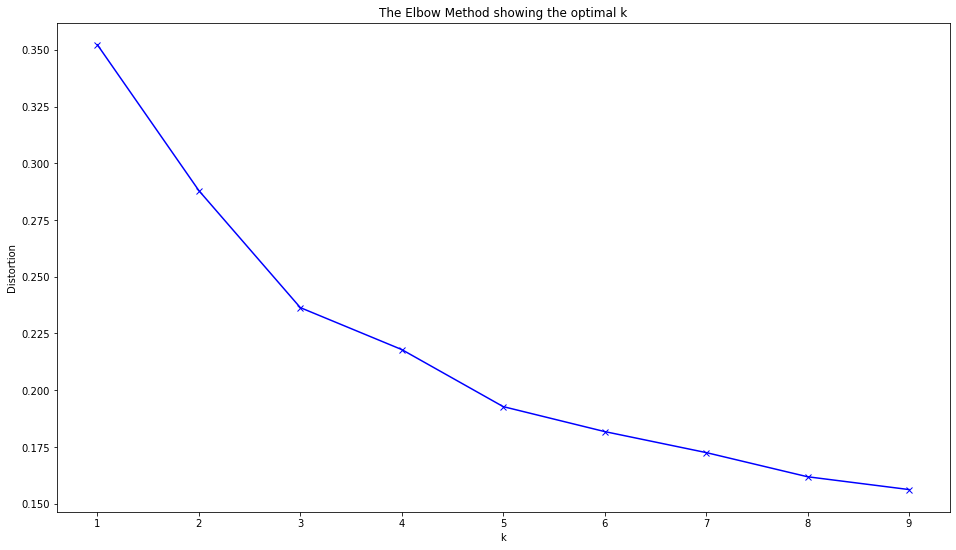

In [80]:
# clustering dataset
# determine k using elbow method

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

# create new plot and data
plt.plot()
X = data3.values
colors = ['b', 'g', 'r']
markers = ['o', 'v', 's']

# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

From the elbow method, I found the optimal k is 3.

### Silhouette Score: 
This is a better measure to decide the number of clusters to be formulated from the data. It is calculated for each instance and the formula goes like this:

Silhouette Coefficient = (x-y)/ max(x,y)

The coefficient varies between -1 and 1. A value close to 1 implies that the instance is close to its cluster is a part of the right cluster. Whereas, a value close to -1 means that the value is assigned to the wrong cluster.

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.36313738377703314
For n_clusters = 3 The average silhouette_score is : 0.40930726860876376
For n_clusters = 4 The average silhouette_score is : 0.4346645576369415
For n_clusters = 5 The average silhouette_score is : 0.3527398114805471
For n_clusters = 6 The average silhouette_score is : 0.3560430495651625


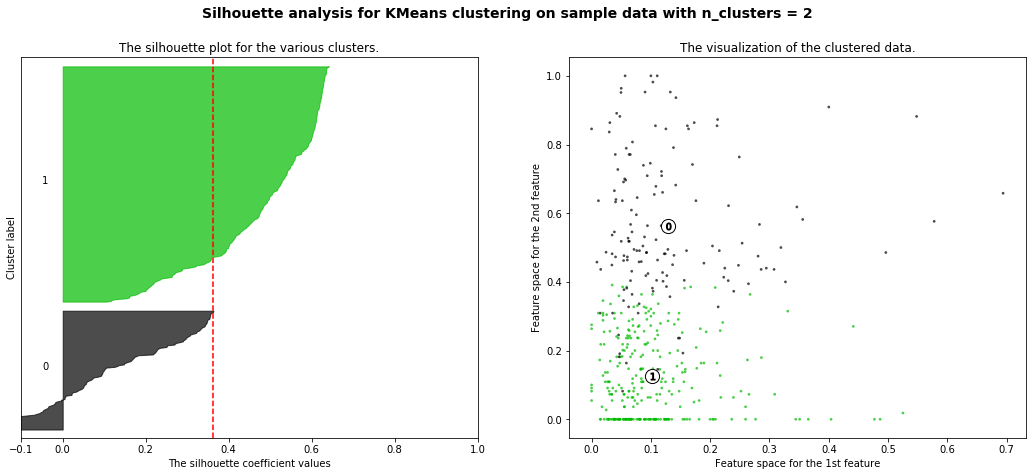

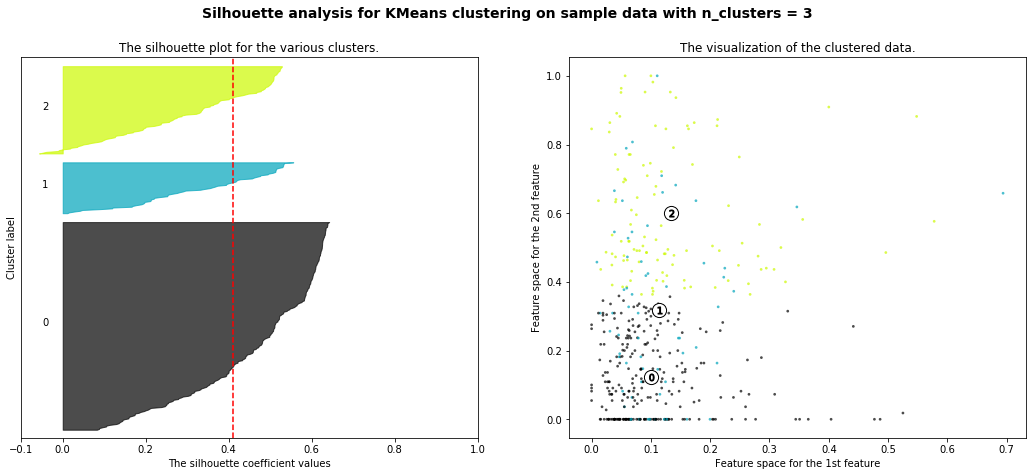

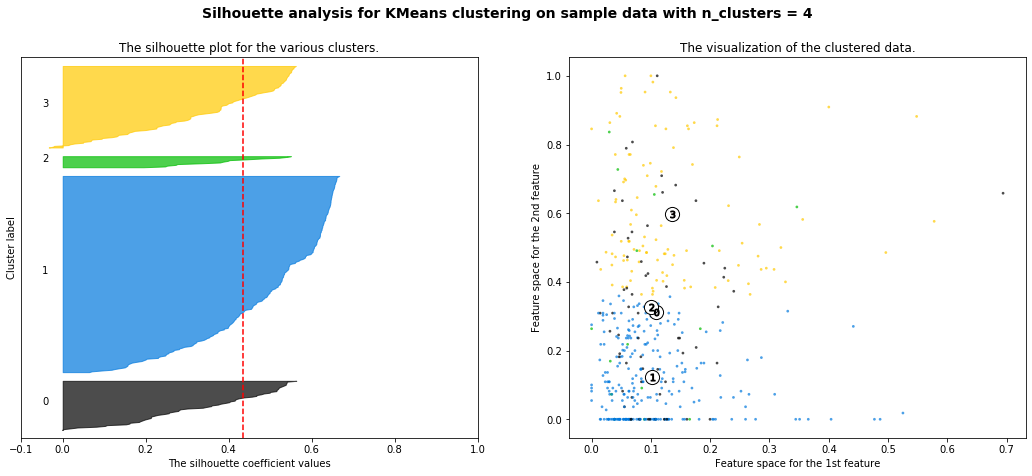

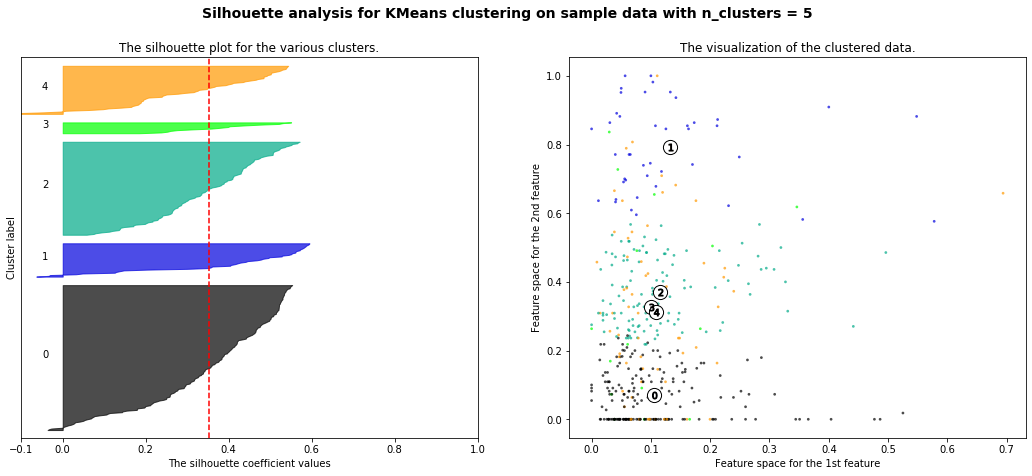

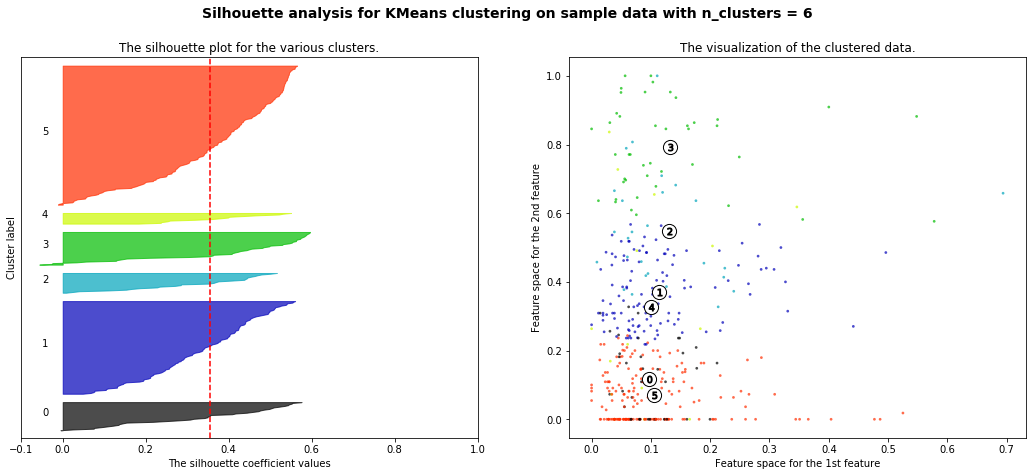

In [89]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

X = data3.values
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

From the score, I could see the Silhouette analysis gives me the best value of k = 4.

The output of these plots indicative of a K value that is not in line with the number of clusters I selected 
from the output of the hierarchical Dendrogram.

I would plot them in the following series:

- k = 3
- k = 4

[[0.11298339 0.31731061 0.02824001 0.03696971 0.09107097 0.62302098
  0.015625  ]
 [0.10074237 0.12279153 0.02650681 0.04350678 0.12020064 0.02524782
  0.03229974]
 [0.13332606 0.59951988 0.02519705 0.0381708  0.09798824 0.01798222
  0.03975535]]


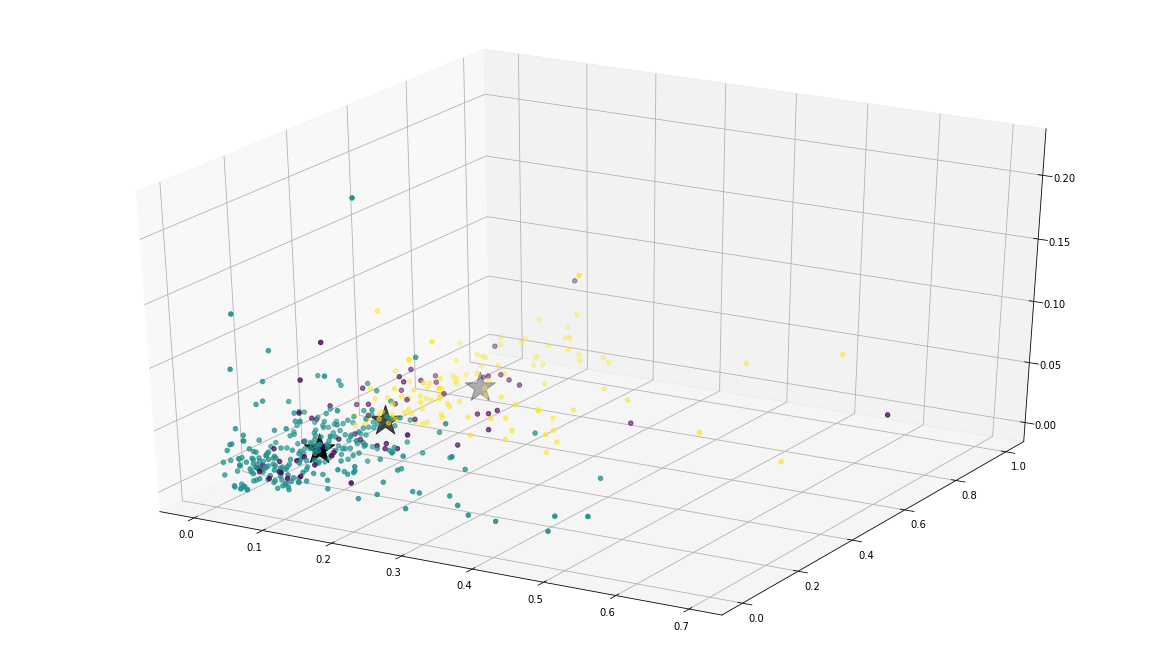

In [90]:
## First, I will set k = 3:
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import axes3d

# Number of clusters
kmeans = KMeans(n_clusters=3)
# Fitting the input data
kmeans = kmeans.fit(data3)
# Getting the cluster labels
labels = kmeans.predict(data3)
# Centroid values
C = kmeans.cluster_centers_
print(C) 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c='#050505', s=1000)
ax.scatter(data3.iloc[:, 0].values, data3.iloc[:, 1].values, data3.iloc[:, 2].values, c=labels)

[[ 1.35313501e-01  5.97442599e-01  2.53017838e-02  3.79880584e-02
   9.87162231e-02  1.88467544e-02 -1.38777878e-17]
 [ 9.95032051e-02  3.27342657e-01  2.53099588e-02  5.28611900e-02
   1.35185321e-01  6.40651167e-02  8.22222222e-01]
 [ 1.09282273e-01  3.12534873e-01  2.84652441e-02  3.75565356e-02
   9.23977227e-02  6.23542265e-01 -6.93889390e-18]
 [ 1.01626795e-01  1.22899172e-01  2.64588326e-02  4.27377184e-02
   1.18095187e-01  2.46712507e-02  5.35475234e-03]]


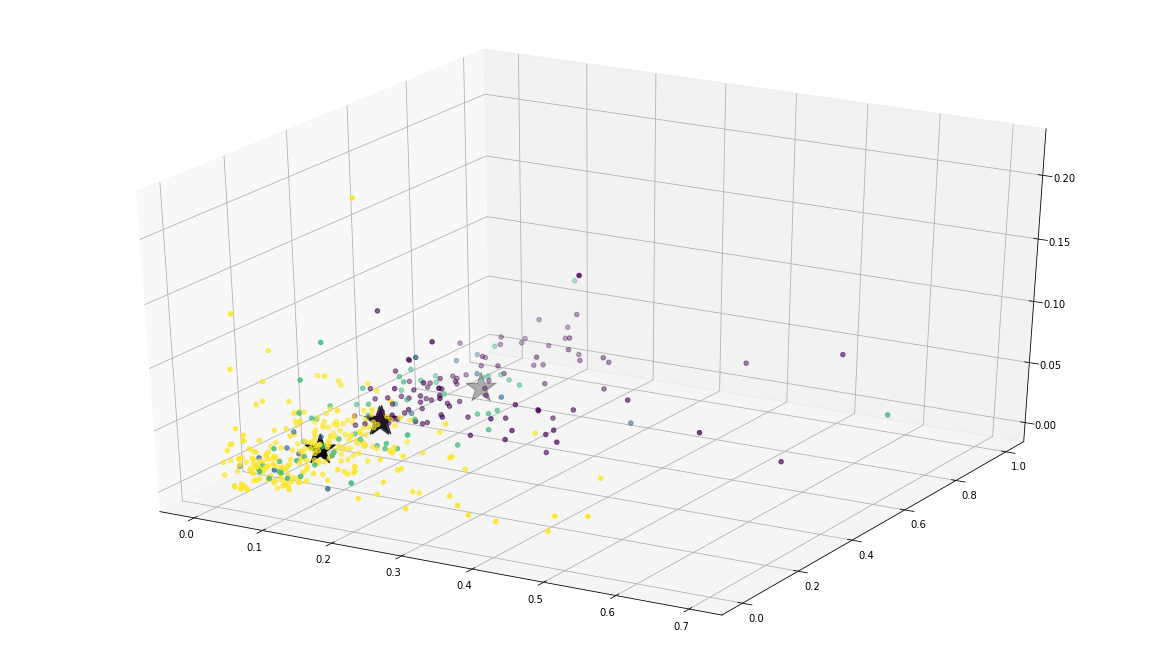

In [91]:
## Then, I will set k = 4:
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import axes3d

# Number of clusters
kmeans = KMeans(n_clusters=4)
# Fitting the input data
kmeans = kmeans.fit(data3)
# Getting the cluster labels
labels = kmeans.predict(data3)
# Centroid values
C = kmeans.cluster_centers_
print(C) 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], C[:, 3], marker='*', c='#050505', s=1000)
ax.scatter(data3.iloc[:, 0].values, data3.iloc[:, 1].values, data3.iloc[:, 2].values, data3.iloc[:, 3].values, c=labels)

### Apply a K-means clustering algorithm to the data set using a value of K=2. 

Perform EDA on these two groupings: what do the summary statistics tell you? Are the groupings 
noticeably different from one another?

[[0.10196748 0.12458276 0.02666687 0.04212557 0.11750742 0.06140339
  0.02913753]
 [0.12822281 0.56348339 0.02597151 0.0393346  0.09595795 0.21231705
  0.03678161]]


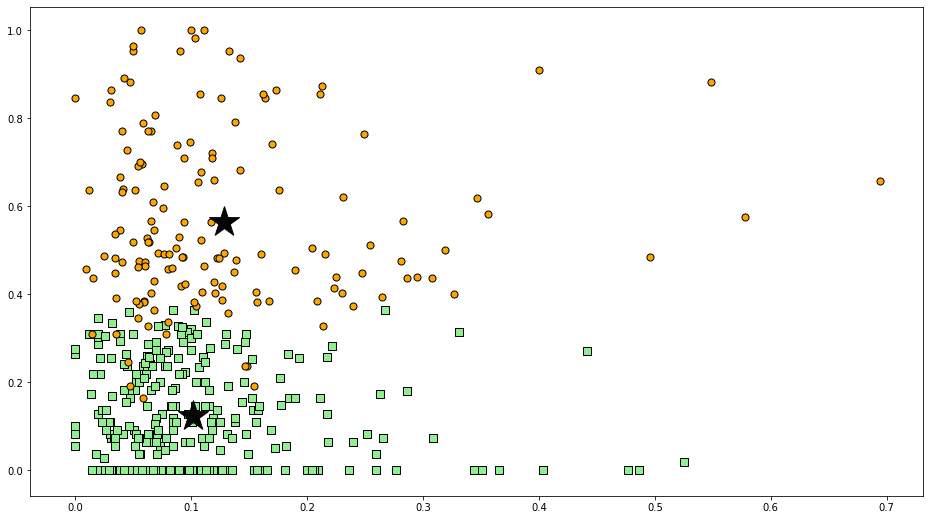

In [139]:
X = data3.values
# model
km = KMeans(n_clusters = 2)
y_km=km.fit_predict(X)
# plot the 2 clusters
plt.scatter(
    X[y_km == 0, 0], X[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)
plt.scatter(
    X[y_km == 1, 0], X[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)
## Plot 2 centers
C = kmeans.cluster_centers_
print(C) 
plt.scatter(C[:, 0], C[:, 1], marker='*', c='#050505', s=1000)

In [140]:
# value counts in different clusters
frame = pd.DataFrame(X)
frame['cluster'] = y_km
frame['cluster'].value_counts()

0    283
1    148
Name: cluster, dtype: int64

There are 283 points belong to cluster one, and 148 points belong to cluster two.
There is the difference between them: Cluster one has more points.

Add a new column to my Pandas dataframe with the name Revenue. Within this new column, insert 
the grouping assignments identified by my K-means clustering for each observation within the data 
set:

In [150]:
data3['Revenue'] = y_km

See the result:

In [151]:
data3

,AD,ID,PRD,BounceRates,ExitRates,PageValues,SpecialDay,Revenue
18,0.097115,0.127273,0.024897,0.000000,0.024681,0.000000,0.0,0
38,0.047405,0.190909,0.019889,0.017857,0.085409,0.795528,0.0,1
53,0.094615,0.222727,0.026341,0.074074,0.152234,0.000000,0.0,0
99,0.045481,0.000000,0.042865,0.000000,0.164887,0.000000,0.0,0
124,0.115064,0.145455,0.035676,0.026316,0.096460,0.000000,0.0,0
...,...,...,...,...,...,...,...,...
12250,0.008974,0.457576,0.015570,0.095238,0.137773,1.000000,0.0,1
12266,0.026923,0.136364,0.097891,0.000000,0.072700,0.000000,0.0,0
12291,0.080769,0.490909,0.030792,0.000000,0.017794,0.000000,0.0,1
12292,0.083084,0.181818,0.104583,0.066667,0.121993,0.580608,0.0,0


Read the Project2_Data_Labels.csv file and add its content to another 
new column within my Pandas dataframe. Assign a column name of V_Revenue to this new column. 
This new column contains the actual classification labels for the observations contained within the 
data set and indicates whether or not a web site visitor executed a purchase before leaving the web 
site. 
Compare the content of V_Revenue to the content of the Revenue column generated by my 
clustering algorithm: 

In [152]:
data3['V_Revenue'] = labeldata['Revenue']

See the result:

In [153]:
data3

,AD,ID,PRD,BounceRates,ExitRates,PageValues,SpecialDay,Revenue,V_Revenue
18,0.097115,0.127273,0.024897,0.000000,0.024681,0.000000,0.0,0,True
38,0.047405,0.190909,0.019889,0.017857,0.085409,0.795528,0.0,1,True
53,0.094615,0.222727,0.026341,0.074074,0.152234,0.000000,0.0,0,False
99,0.045481,0.000000,0.042865,0.000000,0.164887,0.000000,0.0,0,False
124,0.115064,0.145455,0.035676,0.026316,0.096460,0.000000,0.0,0,False
...,...,...,...,...,...,...,...,...,...
12250,0.008974,0.457576,0.015570,0.095238,0.137773,1.000000,0.0,1,False
12266,0.026923,0.136364,0.097891,0.000000,0.072700,0.000000,0.0,0,True
12291,0.080769,0.490909,0.030792,0.000000,0.017794,0.000000,0.0,1,False
12292,0.083084,0.181818,0.104583,0.066667,0.121993,0.580608,0.0,0,False


Change the V_Revenue to hotcode:

In [154]:
data3['V_Revenue'] = data3.V_Revenue.astype('category').cat.codes

Check the result:

In [155]:
data3

,AD,ID,PRD,BounceRates,ExitRates,PageValues,SpecialDay,Revenue,V_Revenue
18,0.097115,0.127273,0.024897,0.000000,0.024681,0.000000,0.0,0,1
38,0.047405,0.190909,0.019889,0.017857,0.085409,0.795528,0.0,1,1
53,0.094615,0.222727,0.026341,0.074074,0.152234,0.000000,0.0,0,0
99,0.045481,0.000000,0.042865,0.000000,0.164887,0.000000,0.0,0,0
124,0.115064,0.145455,0.035676,0.026316,0.096460,0.000000,0.0,0,0
...,...,...,...,...,...,...,...,...,...
12250,0.008974,0.457576,0.015570,0.095238,0.137773,1.000000,0.0,1,0
12266,0.026923,0.136364,0.097891,0.000000,0.072700,0.000000,0.0,0,1
12291,0.080769,0.490909,0.030792,0.000000,0.017794,0.000000,0.0,1,0
12292,0.083084,0.181818,0.104583,0.066667,0.121993,0.580608,0.0,0,0


### Plot a bar plot to see whether the grouping is indicative of the true result: The blue is the grouping result, the orange is the true result:

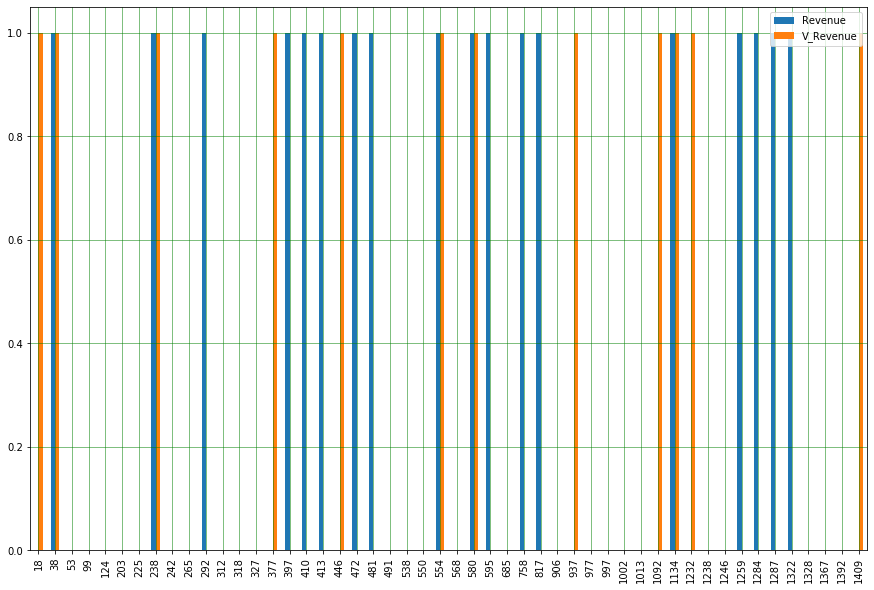

In [161]:
Revenue = data3['Revenue']
V_Revenue = data3['V_Revenue']
datacomparison = pd.DataFrame({'Revenue': Revenue, 'V_Revenue': V_Revenue})
df1 = datacomparison.head(50)
df1.plot(kind='bar',figsize=(15,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

### Compare the values:

In [167]:
data3['RevenueMatch?'] = np.where(data3['Revenue'] == data3['V_Revenue'], 'True', 'False')
data3['RevenueMatch?'] = data3.V_Revenue.astype('category').cat.codes
data3

,AD,ID,PRD,BounceRates,ExitRates,PageValues,SpecialDay,Revenue,V_Revenue,RevenueMatch?
18,0.097115,0.127273,0.024897,0.000000,0.024681,0.000000,0.0,0,1,1
38,0.047405,0.190909,0.019889,0.017857,0.085409,0.795528,0.0,1,1,1
53,0.094615,0.222727,0.026341,0.074074,0.152234,0.000000,0.0,0,0,0
99,0.045481,0.000000,0.042865,0.000000,0.164887,0.000000,0.0,0,0,0
124,0.115064,0.145455,0.035676,0.026316,0.096460,0.000000,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
12250,0.008974,0.457576,0.015570,0.095238,0.137773,1.000000,0.0,1,0,0
12266,0.026923,0.136364,0.097891,0.000000,0.072700,0.000000,0.0,0,1,1
12291,0.080769,0.490909,0.030792,0.000000,0.017794,0.000000,0.0,1,0,0
12292,0.083084,0.181818,0.104583,0.066667,0.121993,0.580608,0.0,0,0,0


In [168]:
data3['RevenueMatch?'].value_counts()

0    355
1     76
Name: RevenueMatch?, dtype: int64

The above result manifests there are 355 different results between Revenue and V_Revenue, also there are 76 same result, the similarity is not apparent.

### Comparative Statistics:
Two-Sample T-Test:

In [171]:
from scipy import stats
stats.ttest_ind(Revenue, V_Revenue)

Ttest_indResult(statistic=5.689454145683611, pvalue=1.7470470397581997e-08)

My t-statistic value is 5.689, the p-value in this case is 1.747e-08, which is below than the standard thresholds of 0.05 or 0.01, so we reject the null hypothesis and we can say there is a statistically significant difference between the Revenue and V_Revenue.

### Apply my knowledge of feature selection  techniques to identify explanatory variables for inclusion within my SVM models.

1. Chi-Squared selection

The scikit-learn library provides the SelectKBest class that can be used with a suite of different statistical tests to select a specific number of features, in this case, it is Chi-Squared:

In [200]:
# Import the necessary libraries first
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = data3[['AD','ID','PRD','BounceRates','ExitRates','PageValues','SpecialDay']]
y = data3['Revenue']
# Feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, y)

# Summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)

features = fit.transform(X)
# Summarize selected features
print(features[0:5,:])

[6.582e-01 7.092e+01 1.284e-03 3.893e-02 4.663e-01 1.240e+01 1.331e-01]
[[0.097 0.127 0.025 0.   ]
 [0.047 0.191 0.085 0.796]
 [0.095 0.223 0.152 0.   ]
 [0.045 0.    0.165 0.   ]
 [0.115 0.145 0.096 0.   ]]


### Interpretation:
I can see the scores for each attribute and the 4 attributes chosen (those with the highest scores): 'ID', 'ExitRates','PageValues','SpecialDay'. This scores will help me further in determining the best features for training my model.


2. Recursive Feature Elimination

Next, I will implement Recursive Feature Elimination which is a type of wrapper feature selection method.

The Recursive Feature Elimination (or RFE) works by recursively removing attributes and building a model on those attributes that remain.

It uses the model accuracy to identify which attributes (and combination of attributes) contribute the most to predicting the target attribute.

I will use RFE with the Logistic Regression classifier to select the top 4 features. The choice of algorithm does not matter too much as long as it is skillful and consistent.

In [201]:
# Import your necessary dependencies
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
X = data3[['AD','ID','PRD','BounceRates','ExitRates','PageValues','SpecialDay']]
y = data3['Revenue']
# Feature extraction
model = LogisticRegression()
rfe = RFE(model, 4)
fit = rfe.fit(X, y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

Num Features: 4
Selected Features: [ True  True False False  True  True False]
Feature Ranking: [1 1 4 3 1 1 2]


### Interpretation:

I can see that RFE chose the top 4 features as ID, AD, ExitRates and PageValues.

Then, I Separate the dataframe into model training and testing subsets. 
Construct at least two different SVM models using different exploratory variables for purposes of 
predicting the value of the Revenue classifier.

- First, I will use the exploratory variables which Chi-Squared help me choose:
- Second, I will use the exploratory variables which RFE help me choose:

[1 1 0 1 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0
 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1
 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0 1 0 1 0 0
 0 1 1 1 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        84
           1       0.96      1.00      0.98        46

    accuracy                           0.98       130
   macro avg       0.98      0.99      0.98       130
weighted avg       0.99      0.98      0.98       130



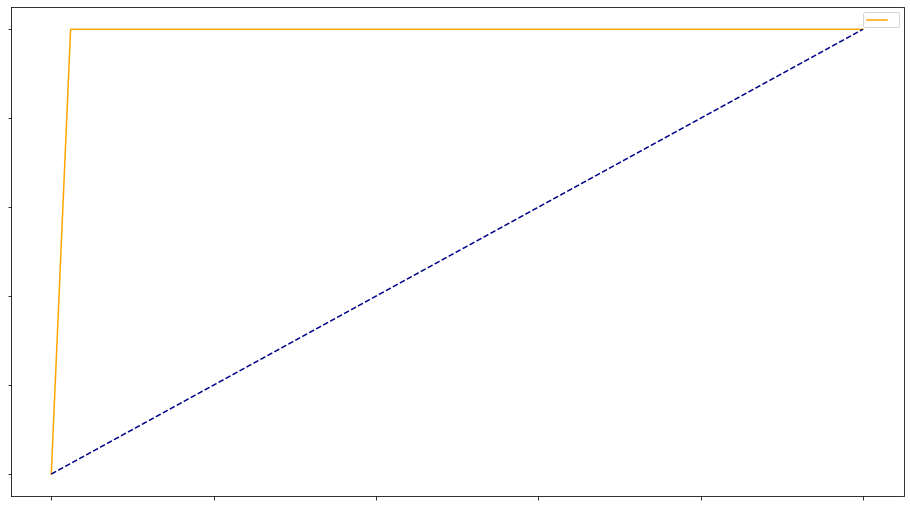

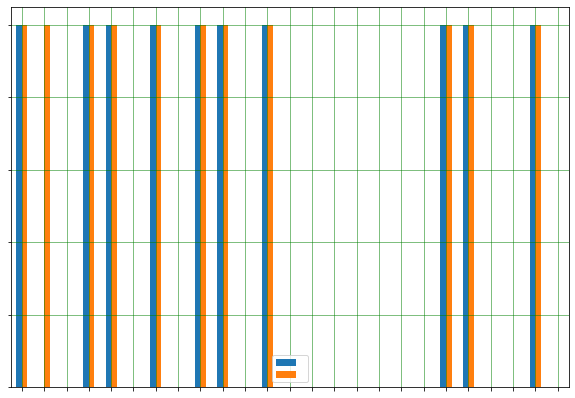

In [202]:
from sklearn.model_selection import train_test_split 
X = data3[['ID','ExitRates','PageValues','SpecialDay']]
y = data3['Revenue']
# split into 70:30 ration 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0) 
# import SMOTE module from imblearn library 
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel()) 

#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train_res, y_train_res)

#Predict the response for test dataset
print(clf.predict(X_test))

predictions = clf.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report 
print(classification_report(y_test, predictions))

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
fpr, tpr, thresholds = roc_curve(y_test,predictions)
plot_roc_curve(fpr, tpr)

from sklearn.model_selection import cross_val_score
cross_val_score(clf, X, y, cv=5)

y_pred = clf.predict(X_test)
dataprediction = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = dataprediction.head(25)
df1.plot(kind='bar',figsize=(10,7))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

[1 1 0 1 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0
 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1
 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0 1 0 1 0 0
 0 1 1 1 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        84
           1       0.94      1.00      0.97        46

    accuracy                           0.98       130
   macro avg       0.97      0.98      0.98       130
weighted avg       0.98      0.98      0.98       130



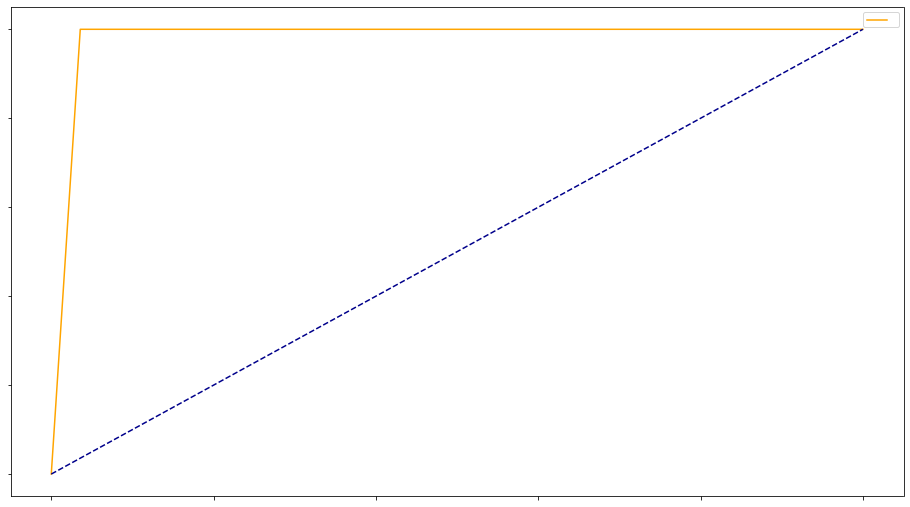

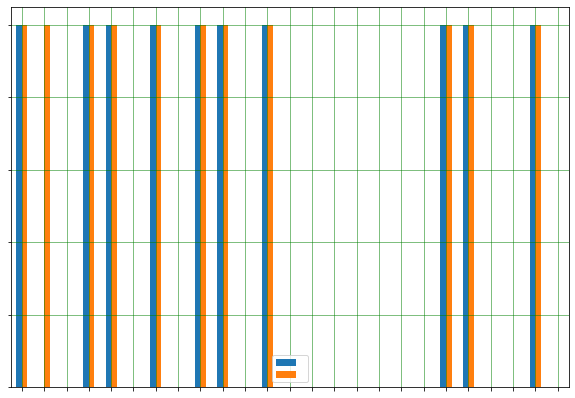

In [203]:
from sklearn.model_selection import train_test_split 
X = data3[['ID','AD','ExitRates','PageValues']]
y = data3['Revenue']
# split into 70:30 ration 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0) 
# import SMOTE module from imblearn library 
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel()) 

#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train_res, y_train_res)

#Predict the response for test dataset
print(clf.predict(X_test))

predictions = clf.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report 
print(classification_report(y_test, predictions))

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
fpr, tpr, thresholds = roc_curve(y_test,predictions)
plot_roc_curve(fpr, tpr)

from sklearn.model_selection import cross_val_score
cross_val_score(clf, X, y, cv=5)

y_pred = clf.predict(X_test)
dataprediction = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = dataprediction.head(25)
df1.plot(kind='bar',figsize=(10,7))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

## Comparing two models:

### The first model has better percision in True revenue, better recall score in false revenue, better f1-score in true revenue score. Therefore, I chose the first model as the best SVM model. 


Finally, compare the predicted values for the Revenue attribute from the testing data set to the 
corresponding values of the V_Revenue variable.

[1 1 0 1 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0
 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1
 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0 1 0 1 0 0
 0 1 1 1 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0]
[0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1
 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0]


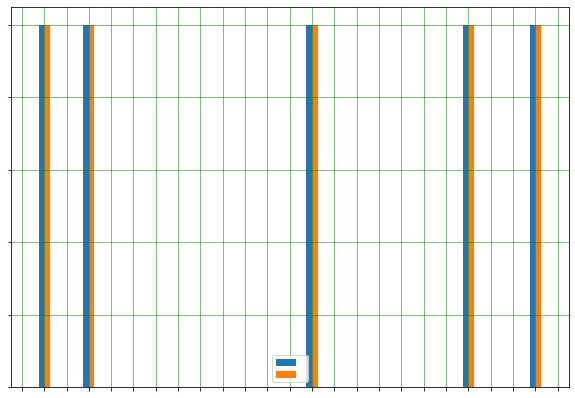

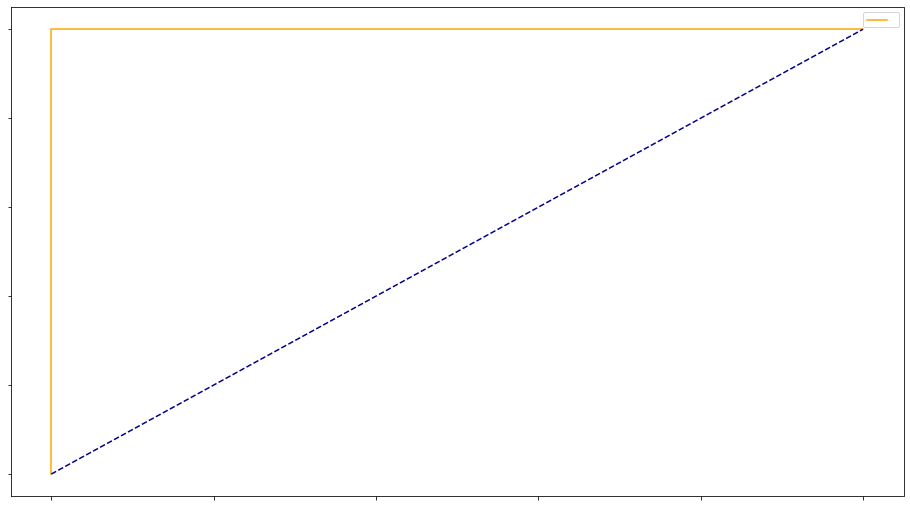

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       104
           1       1.00      1.00      1.00        26

    accuracy                           1.00       130
   macro avg       1.00      1.00      1.00       130
weighted avg       1.00      1.00      1.00       130



In [207]:
from sklearn.model_selection import train_test_split 
X = data3[['ID','ExitRates','PageValues','SpecialDay']]
y = data3['Revenue']
# split into 70:30 ration 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0) 
# import SMOTE module from imblearn library 
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel()) 

#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train_res, y_train_res)

#Predict the response for test dataset
print(clf.predict(X_test))

from sklearn.model_selection import cross_val_score
cross_val_score(clf, X, y, cv=5)


from sklearn.model_selection import train_test_split 
X = data3[['ID','ExitRates','PageValues','SpecialDay']]
z = data3['V_Revenue']
# split into 70:30 ration 
X_train, X_test, z_train, z_test = train_test_split(X, z, test_size = 0.3, random_state = 0) 
# import SMOTE module from imblearn library 
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_res, z_train_res = sm.fit_sample(X_train, z_train.ravel()) 

#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train_res, z_train_res)

#Predict the response for test dataset
print(clf.predict(X_test))

from sklearn.model_selection import cross_val_score
cross_val_score(clf, X, z, cv=5)

z_pred = clf.predict(X_test)

dataprediction = pd.DataFrame({'Actual': z_pred, 'Predicted': y_pred})
df1 = dataprediction.head(25)
df1.plot(kind='bar',figsize=(10,7))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()


from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
fpr, tpr, thresholds = roc_curve(y_pred, z_pred)
plot_roc_curve(fpr, tpr)

from sklearn.metrics import confusion_matrix, classification_report 
print(classification_report(z_pred, y_pred))

The metrics show the SVM model derived from the results of my clustering work match up to the actual V_Revenue classifications very well.

## Conclusion:

In this report, I have applied the full data science project lifecycle to the implementation of SVM model and clustering model on a data set consisting of data on 18 different types of conditions in which the potential buyer visited the website, to use clustering algorithms to create groupings of similar data observations within the provided data set, apply labels to the data observations assigned to those groupings, and then, after completing the necessary EDA and data prep work, construct different SVM models to predict the most likely categorization of any previously unseen data items.

I have completed the dimension reduction by create three new variables, AD is the administrative page duration per page, ID is the Infomational page duration per page, and PRD is the Product Related page duration per page.

For the categorical variables, it is better to use k-modes but my system could not install the package, so I leave the categorical variables alone.

Finally, I chose the best SVM model is the model with exploratory variables 'ID','ExitRates','PageValues', and 'SpecialDay', the clustering algorithm with 2 groupings and SVM model with exploratory variables 'ID','ExitRates','PageValues', and 'SpecialDay' could perfectly predict the true revenue classification.